# Problem Statement

 A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house. 

    Also, determine the optimal value of lambda for ridge and lasso regression.
 

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
### ignoring all the warning that might come
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing packages for Linear Regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Importing RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# importing r2_scoe, vif ans stats model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer

# importing models
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# Settings the number of rows to display in output to few all column data
# got below code from "https://stackoverflow.com/questions/58298963/jupyter-not-showing-whole-output" url
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 1: Reading Data and Understanding the Data
Reading and understanding the data in the dataset

In [4]:
# reading day.csv file and storing the same in housing_df, as the data is for housing 
housing_df = pd.read_csv('train.csv')
# printing the top 5 records to view the data
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# printing the data to view the shape of data, to understand the size of the data
housing_df.shape

(1460, 81)

We can see that,
- there are 1460 records there in the dataset
- we have 81 columns in the dataset

In [6]:
# id column is for indexing purpose which is not required for analysis purpose, so dropping these values
housing_df = housing_df.drop(columns='Id', axis=1)
# Printing the shape of the dataset to check the column is dropped or not
housing_df.shape

(1460, 80)

> we can see that initial there were 81 columns and now it's 80 columns

In [7]:
# Now, printing the dataset info to check for any missing values as well as datatypes of the columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

> We can observe that there are missing data in the dataset.

> Lets print the actual missing value columns

## Data Preparation

- Changing the Categorical numeric values into Categorical String values
- Dropping unneccessary columns
- Imputing the null values

In [8]:
# printing the columns with null values
housing_df.columns[housing_df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

> As per the data definition of the columns with Null values, Null/NA means something like no fencing, no alley, etc. So not changing the values

In [9]:
#  As per the data definition
# if the column contains a null value it means there is no linear feet of street connecting to property
# similarly filling the null values with it's respective definition
housing_df.LotFrontage = housing_df.LotFrontage.fillna(0)
housing_df.Alley = housing_df.Alley.fillna('No alley access')
housing_df.MasVnrType = housing_df.MasVnrType.fillna('None')
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(0)
housing_df.BsmtQual = housing_df.BsmtQual.fillna('No Basement')
housing_df.BsmtCond = housing_df.BsmtCond.fillna('No Basement')
housing_df.BsmtExposure = housing_df.BsmtExposure.fillna('No Basement')
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.fillna('No Basement')
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.fillna('No Basement')
# for imputing the Electrical feature, taking mode value of the electrical
housing_df.Electrical = housing_df.Electrical.fillna('SBrkr')
housing_df.FireplaceQu = housing_df.FireplaceQu.fillna('No Fireplace')
housing_df.GarageType = housing_df.GarageType.fillna('No Garage')
housing_df.GarageYrBlt = housing_df.GarageYrBlt.fillna(0)
housing_df.GarageFinish = housing_df.GarageFinish.fillna('No Garage')
housing_df.GarageQual = housing_df.GarageQual.fillna('No Garage')
housing_df.GarageCond = housing_df.GarageCond.fillna('No Garage')
housing_df.PoolQC = housing_df.PoolQC.fillna('No Pool')
housing_df.Fence = housing_df.Fence.fillna('No Fence')
housing_df.MiscFeature = housing_df.MiscFeature.fillna('None')

In [10]:
# printing the list of columns with null values
housing_df.columns[housing_df.isna().any()].tolist()

[]

> We can see that there are no null value features now

In [11]:
# # Full bath is a numeric feature, but this will make sence if we make it sence and same goes to BedroomAbvGr, KitchenAbvGr, etc.
# housing_df.BsmtFullBath = housing_df.BsmtFullBath.astype(str)
# housing_df.BsmtHalfBath = housing_df.BsmtHalfBath.astype(str)
# housing_df.FullBath = housing_df.FullBath.astype(str)
# housing_df.HalfBath = housing_df.HalfBath.astype(str)
# housing_df.BedroomAbvGr = housing_df.BedroomAbvGr.astype(str)
# housing_df.KitchenAbvGr = housing_df.KitchenAbvGr.astype(str)
# housing_df.TotRmsAbvGrd = housing_df.TotRmsAbvGrd.astype(str)
# housing_df.Fireplaces = housing_df.Fireplaces.astype(str)
# housing_df.GarageCars = housing_df.GarageCars.astype(str)
# housing_df.MoSold = housing_df.MoSold.astype(str)

In [12]:
# As per the data definition, in MSZoning there should be C but in the data we can see C (all)
# So, replacing the C (all) with C
housing_df.MSZoning = housing_df.MSZoning.apply(lambda x: x.replace(' (all)', ''))

In [13]:
# Checking columns with a value is available 98% in whole
redundant = []
for i in housing_df.columns:
    counts = housing_df[i].value_counts()
    count_max = counts.iloc[0]
    if count_max / len(housing_df) * 100 > 98:
        redundant.append(i)
print(redundant)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC']


> There are 8 columns with single value dominates with more than or equals 98%. Dropping these columns as these features not usable for analysis in change of sale price

In [14]:
housing_df.drop(redundant,axis=1,inplace=True)
housing_df.shape

(1460, 72)

> Now we have 72 columns

## Univariate analysis

Lets understand the individual features 

In [15]:
# Priting the MSSubClass values count to see the houses with more subs
housing_df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

> We can abserve that the majority of the housing belongs to <b>1-STORY 1946 & NEWER ALL STYLES</b> followed by <b>2-STORY 1946 & NEWER</b>

> Houses with Subclass <b>1-1/2 STORY - UNFINISHED ALL AGES</b> are the least

In [16]:
# analysing MSZoing columns to understand the zoning classification
housing_df['MSZoning'].value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

> Approximately 80% of the houses are in <b>Residential Low Density</b> zone and least of houses are in <b>Commercial</b> zone

In [17]:
# Analysing the lot frontage to see the average lot area of the house
housing_df.LotFrontage.describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

> Now we can see that average Linear feet of street connecting to property is <b>~58 feets

In [18]:
# Lot Area is a numerical features, so printing it's stats for analysis
housing_df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [19]:
# Taking the median for analysis
housing_df.LotArea.median()

9478.5

> we can observe that every house have some lot area, where <b>1300 feets is minimum</b> and <b>215245 is the maximum</b> they have.

> On an average each house have <b>~9479 feets

In [20]:
# Alley is a categorical feature, so priting the value count of the category for analysis
housing_df.Alley.value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

> We can observe that <b>~93%</b> of the houses <b>don't have Alley access</b>

> We can see that only <b>91</b> houses are have either <b>Gravel Alley access</b> or <b>Paved Alley access</b>

In [21]:
# Lot shape feature is a categorical, so printing the count of category value
housing_df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

> We can see that <b>~60%</b> of the houses has <b>Regular shape</b> and less than <b>1%</b> of the houses have <b>irregular shape</b>

In [22]:
# LandContour feature is a categorical, so printing the count of category value
housing_df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

> We can see that <b>~90%</b> of the houses are <b>Near flat level</b>

In [23]:
# Lot Config feature is a categorical, so printing the count of category value
housing_df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

> There are more than <b>80%</b> of the houses has the <b>Inside lot configuration</b> and less than <b>1%</b> of the houses are having <b>Frontage on 3 sides of property lot configuration</b>

In [24]:
# land slope feature is a categorical, so printing the count of category value
housing_df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

> More than <b>90%</b> of the houses has <b>Gentle Slope</b> and less than <b>1%</b> of the houses are <b>Severe Slope</b>

In [25]:
# Neighborhood feature is a categorical, so printing the count of category value
housing_df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

> <b>North Ames location</b> has more houses compare to other locations in Ames city

In [26]:
# condition1 feature is a categorical, so printing the count of category value
housing_df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

> We can observe that <b>86% (1260)</b> houses are in <b>Normal condition</b>

> Houses with <b>Adjacent to East-West Railroad, Adjacent to postive off-site feature,  Within 200' of north-sourth Railroad and Within 200' East-West Railroad</b> condition are less than <b>1%</b>

In [27]:
# Building type feature is a categorical, so printing the count of category value
housing_df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

> <b>~ 83% (1220)</b> of the houses are for <b>Single-Family detached</b> and <b>~2% (31)</b> houses are converted to Two-family where it originally built for one-family

In [28]:
# house stype feature is a categorical, so printing the count of category value
housing_df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

> We can see that One Story and Two Story house has <b>~50% & 30% </b> respectively, which is 80% of the houses

In [29]:
# Overall feature is a categorical, so printing the count of category value
housing_df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

><b>~ 74%</b> of the houses with material quality are Average, above average and good

> less than <b>0.5%</b> of houses with less than poor condition material

><b>~ 2%</b> houses overall materials are Very excellent condition

In [30]:
# overla condition feature is a categorical, so printing the count of category value
housing_df.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

> We can observe that <b>56%</b> of the houses overall condition is Average and <b>37%</b> of the houses condition is more than Average

In [31]:
# roof style feature is a categorical, so printing the count of category value
housing_df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

><b>~ 80%</b> of the houses have Gable roof type and less than 1% of the houses have roof type of Flat, Gambrel, Mansard & Shed

In [32]:
# exterior feature is a categorical, so printing the count of category value
housing_df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

> <b>35%</b> of the housing exterior is Vinyl Siding

In [33]:
# exterior quality is a categorical, so printing the count of category value
housing_df.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

> We can observe that <b>62%</b> of the houses exterior material quality is average and <b>33%</b> of the houses has Good material condition 

In [34]:
# exterior condition is a categorical, so printing the count of category value
housing_df.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

> We can observe that <b>88%</b> of the houses present condition is Average/Typical

In [35]:
# foundation is a categorical, so printing the count of category value
housing_df.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

> Most of the houses foundation is Poured Concrete & Cinder Block where both shares the <b>44% & 43%</b> respectively

In [36]:
# basement quality is a categorical, so printing the count of category value
housing_df.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

> <b>~ 87%</b> of the basement of the houses have basement height between 80 - 99 inches

In [37]:
# central air condition is a categorical, so printing the count of category value
housing_df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

> <b>93%</b> of the houses have Central Air conditioning

In [38]:
# sale condition is a categorical, so printing the count of category value
housing_df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

> We can see that <b>82%</b> of the houses are normal condition for selling

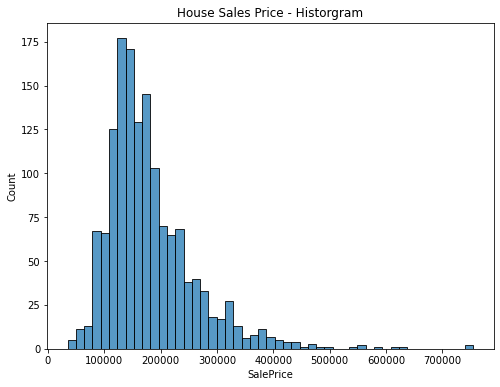

In [39]:
# Ploting histogram for sales price as it's a continuous variable
plt.figure(figsize=(8,6))
# plotting the sales price
sns.histplot(data=housing_df.SalePrice)
# setting the title of the plot
plt.title('House Sales Price - Historgram')
plt.show()

> We can observe that the most of the houses are in between 100K to 200K and number of houses are descreasing towards right side from 200K

## Bivariate Analysis

Now lets see the Bivariate analysis for the features

In [40]:
# Lets take the numeric columns and categorical columns separately for better analysis

# for numerical columns, we take int and float type 
numeric_columns= housing_df.select_dtypes(include=['int64','float64'])
# all the categorical features data type is object, so taking object type columns
categorical_columns = housing_df.select_dtypes(include=['object'])

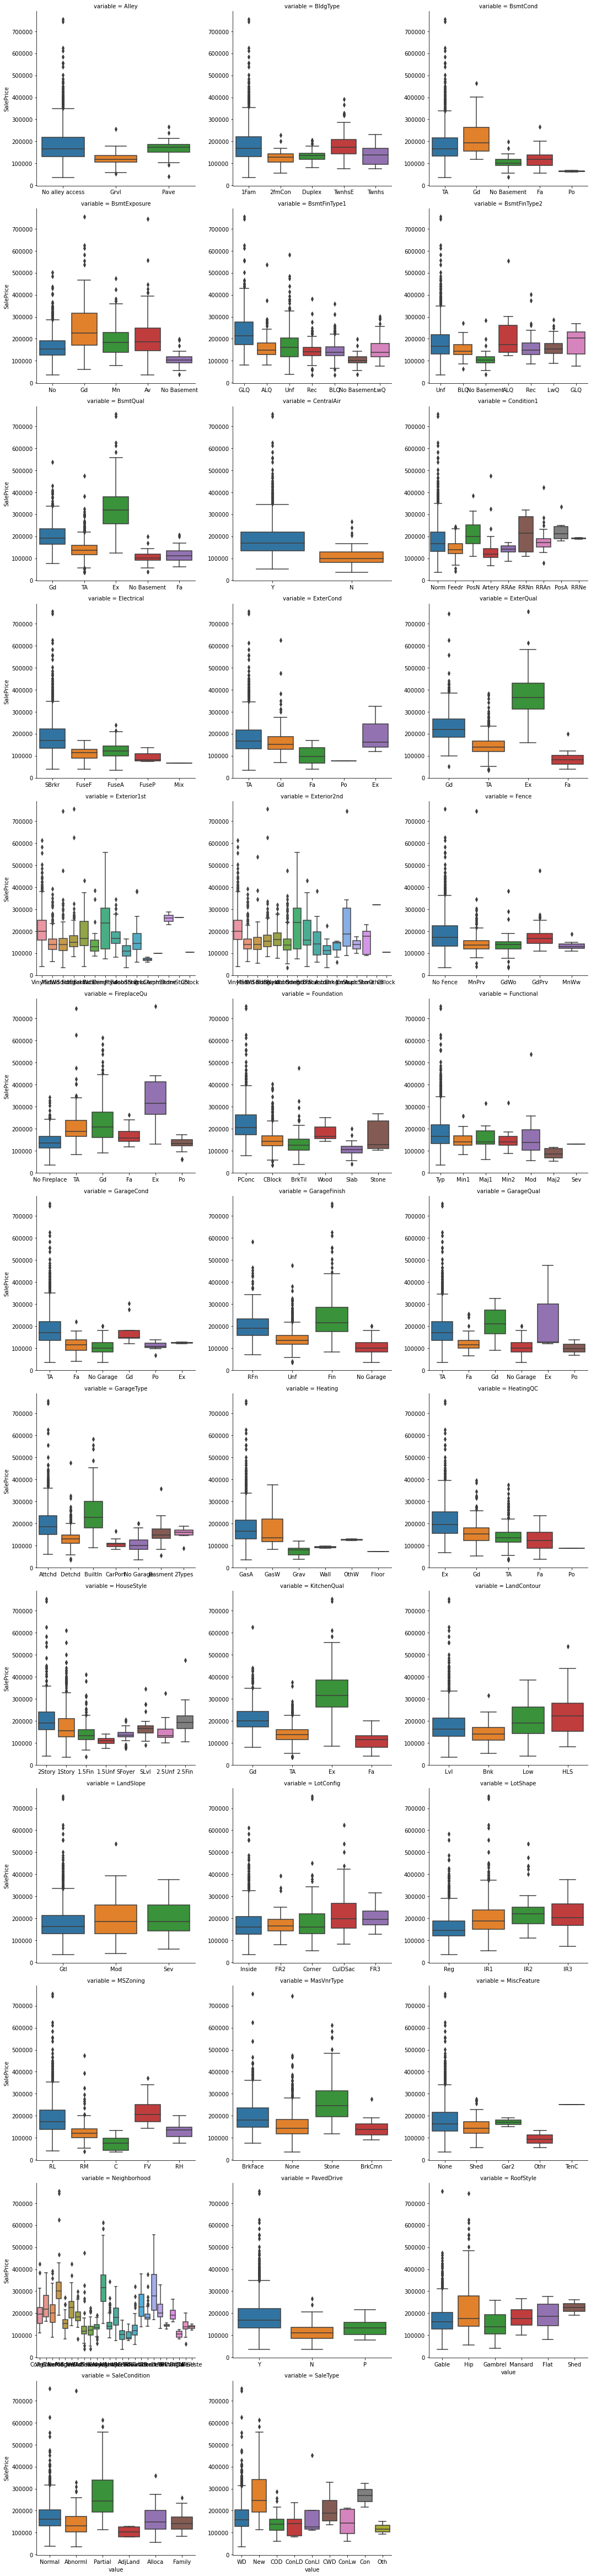

In [41]:
# Plotting Categorical Variables with Sale Price
def plt_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=0)

# Unpivot a DataFrame from wide to long format
# Taking grouping the categorical features against the Sales price
features = pd.melt(housing_df, id_vars=['SalePrice'], value_vars=sorted(housing_df[categorical_columns.columns]))
# Taking Seaborn facetgrid method to have all the box plot in a grid structure
g = sns.FacetGrid(features, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(plt_boxplot, "value", "SalePrice")

<b>Below are the important abservation on above categorical features against Target variable</b>

1. The median Sale Price of the house if greater for house with No Alley access compare to houses with Gravel Alley and the same is approximately equal with Paved Alley. So, we can say that not having an alley access is better for houses, where 75th percentile of the no alley access is greater houses with alley access.
2. We can see that good condition basement sold for higher prices on an average and having poor basement is affecting the Sale price rather than having no basement.
3. Houses with good basement exposure have better sale price than rest.
4. when we see across basement related features like BsmtExposure, BsmtFinType1, BsmtFinType2 & BsmtQual, there is a clear SalesPrice drop compare to houses with basement
5. Houses with Central Air conditioning is tend to Sale for higher price
6. Poor exterior houses have low prices

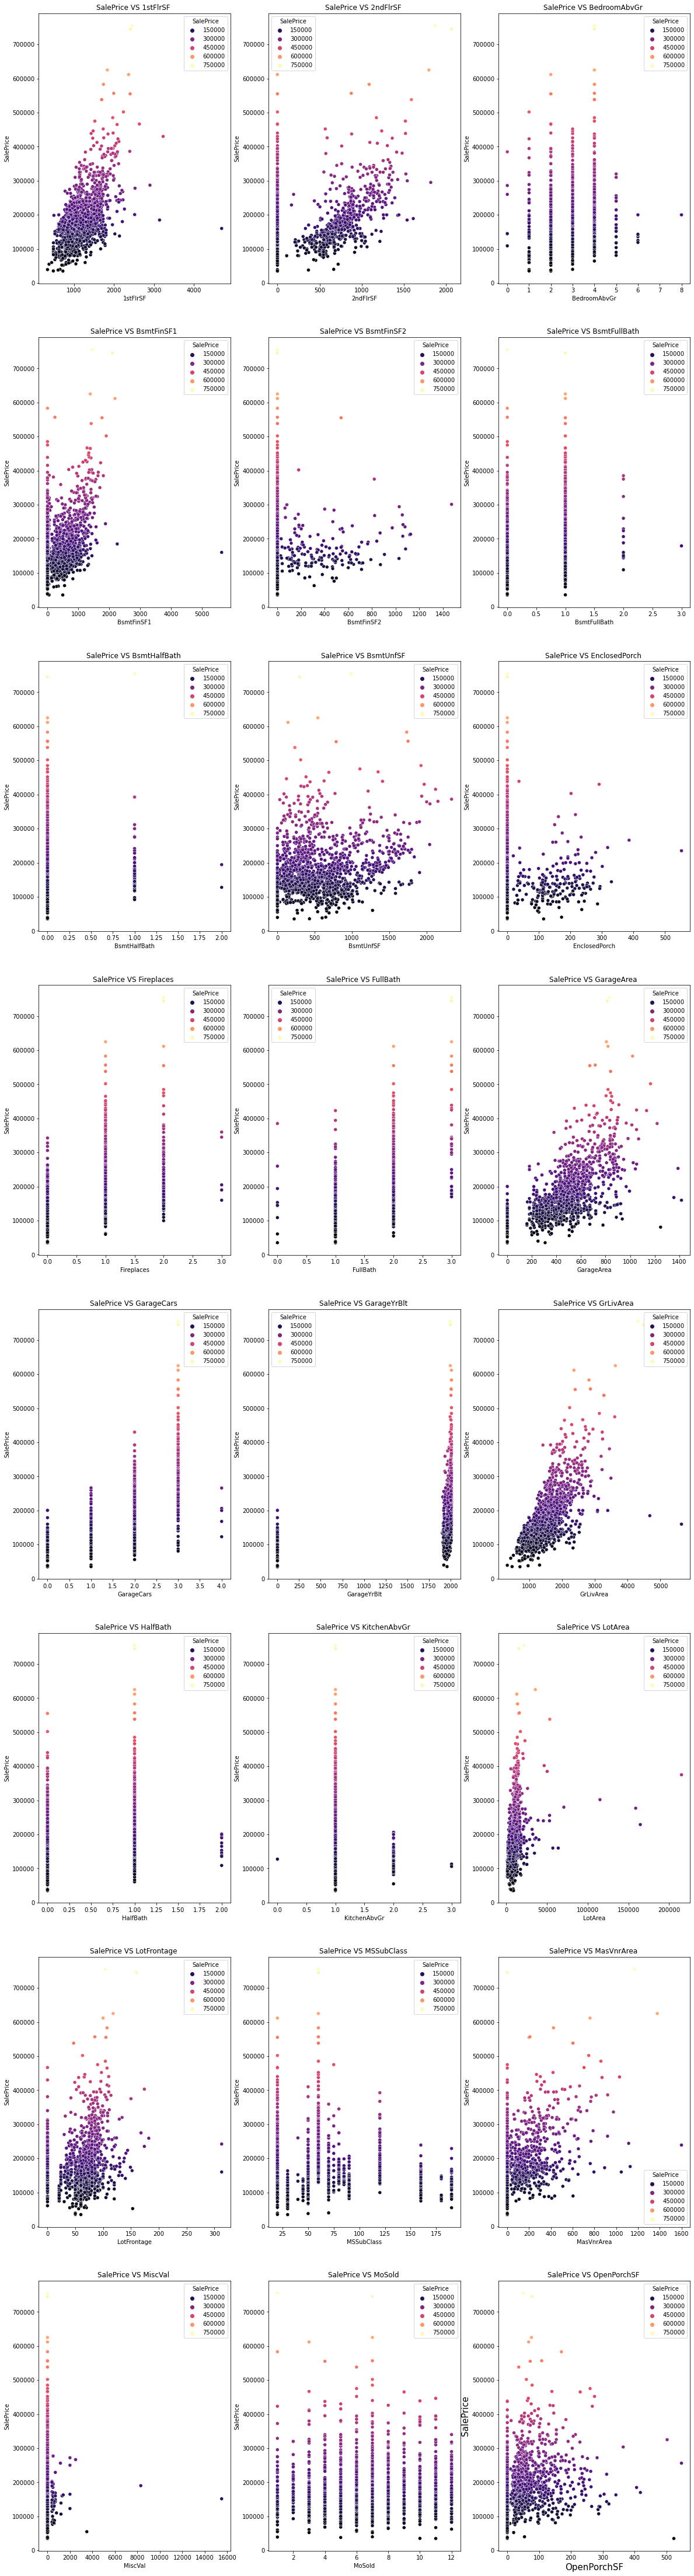

In [42]:
# now lets plot the numerical features against sales price as scatter plot
# lets take do subplot for the numeric columns 
fig, axs= plt.subplots(8,3,figsize=(20,80))

# iteracting through the to create subplots
for x, ax in zip(sorted(numeric_columns.columns), axs.flatten()):
#     plotting scatter plot for Sales price and numeric column, taking paleete as magma for better visual
    sns.scatterplot(x=x, y='SalePrice', hue='SalePrice', data=numeric_columns, ax=ax, palette="magma")
#     setting the x label of the scatter plot
    plt.xlabel(x,fontsize=15)
#     setting the y label of the sale price
    plt.ylabel('SalePrice',fontsize=15)
#     setting the title of the scatter plot
    ax.set_title(f'SalePrice VS {x} ')

<b>Below are the impartant abservation on above numerical features against Target variable</b>

1. Average overall conditioned houses also sold for higher prices
2. By increasing the overall quality, the minimum price of the house is increasing
3. We can see there is a linear relation with the Target variable if we exclude Null/Not available values in a feature

> We can observe that there is a  linear relation between target variable (SalePrice) with 1stFlrSF & GrLivArea. So, We can proceed with the Linear regression 

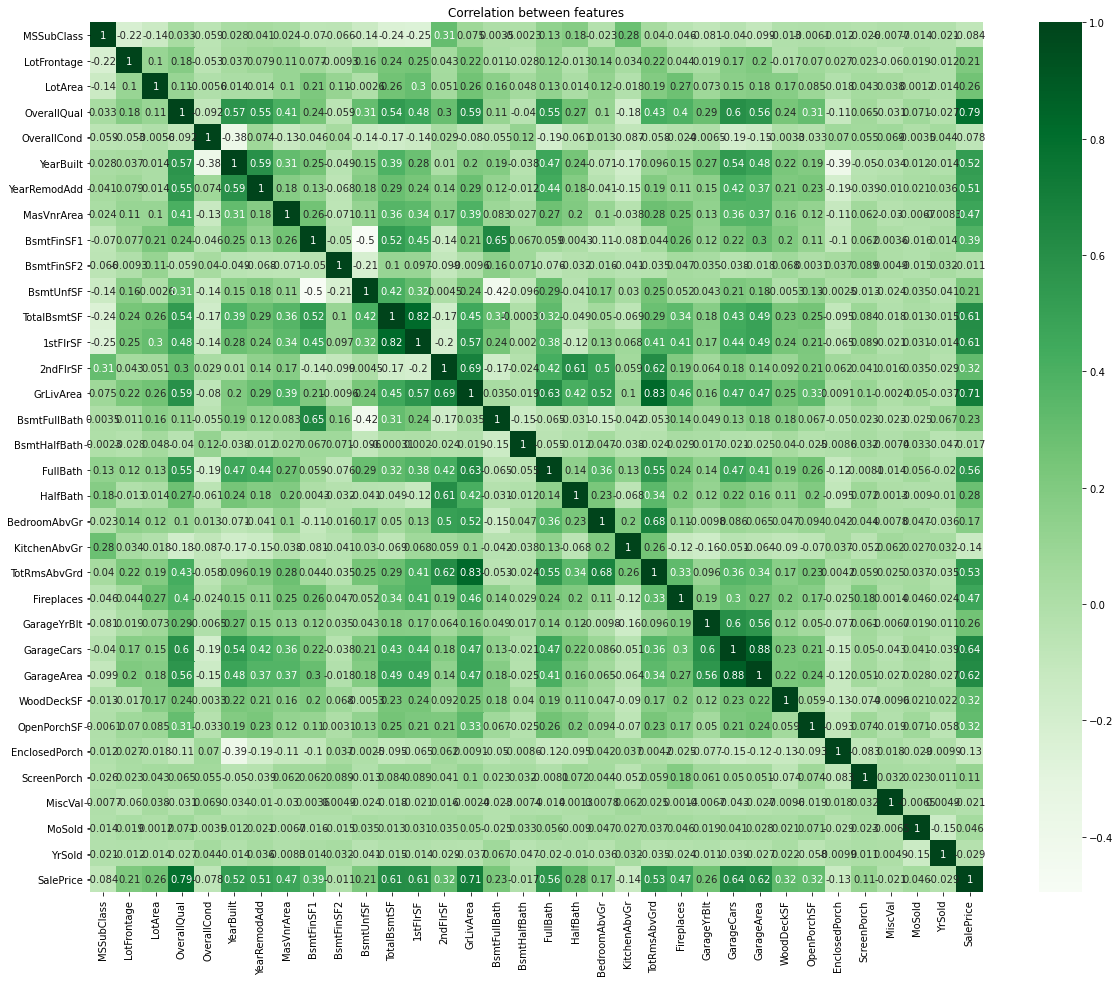

In [43]:
# plotting the heatmap for correlation between the features
# setting the size of the heatmap
plt.figure(figsize=(20,16))
# plotting the heatmap and taking the green for cmap
sns.heatmap(housing_df.corr(), annot=True, cmap='Greens')
# setting the title of the heatmap
plt.title('Correlation between features')
# printing the heatmap
plt.show()

In [44]:
# Remapping the categorical features encoded values with it's original value as per the data definition 
housing_df.MSSubClass = housing_df.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
                                                   30:'1-STORY 1945 & OLDER',
                                                   40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                                   45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                                   50:'1-1/2 STORY FINISHED ALL AGES',
                                                   60:'2-STORY 1946 & NEWER',
                                                   70:'2-STORY 1945 & OLDER',
                                                   75:'2-1/2 STORY ALL AGES',
                                                   80:'SPLIT OR MULTI-LEVEL',
                                                   85:'SPLIT FOYER',
                                                   90:'DUPLEX - ALL STYLES AND AGES',
                                                   120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                                   150:'1-1/2 STORY PUD - ALL AGES',
                                                   160:'2-STORY PUD - 1946 & NEWER',
                                                   180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                                   190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
housing_df.MSZoning = housing_df.MSZoning.map({
    'A':'Agriculture','C':'Commercial','FV':'Floating Village','I':'Industrial','RH':'Residential High Density',
    'RL':'Residential Low Density','RP':'Residential Low Density Park','RM':'Residential Medium Density'
})
housing_df.Alley = housing_df.Alley.map({'Grvl':'Gravel','Pave':'Paved'})
housing_df.OverallQual = housing_df.OverallQual.map({
    1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',
    6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent',
})
housing_df.OverallCond = housing_df.OverallCond.map({
    1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',
    6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent',
})

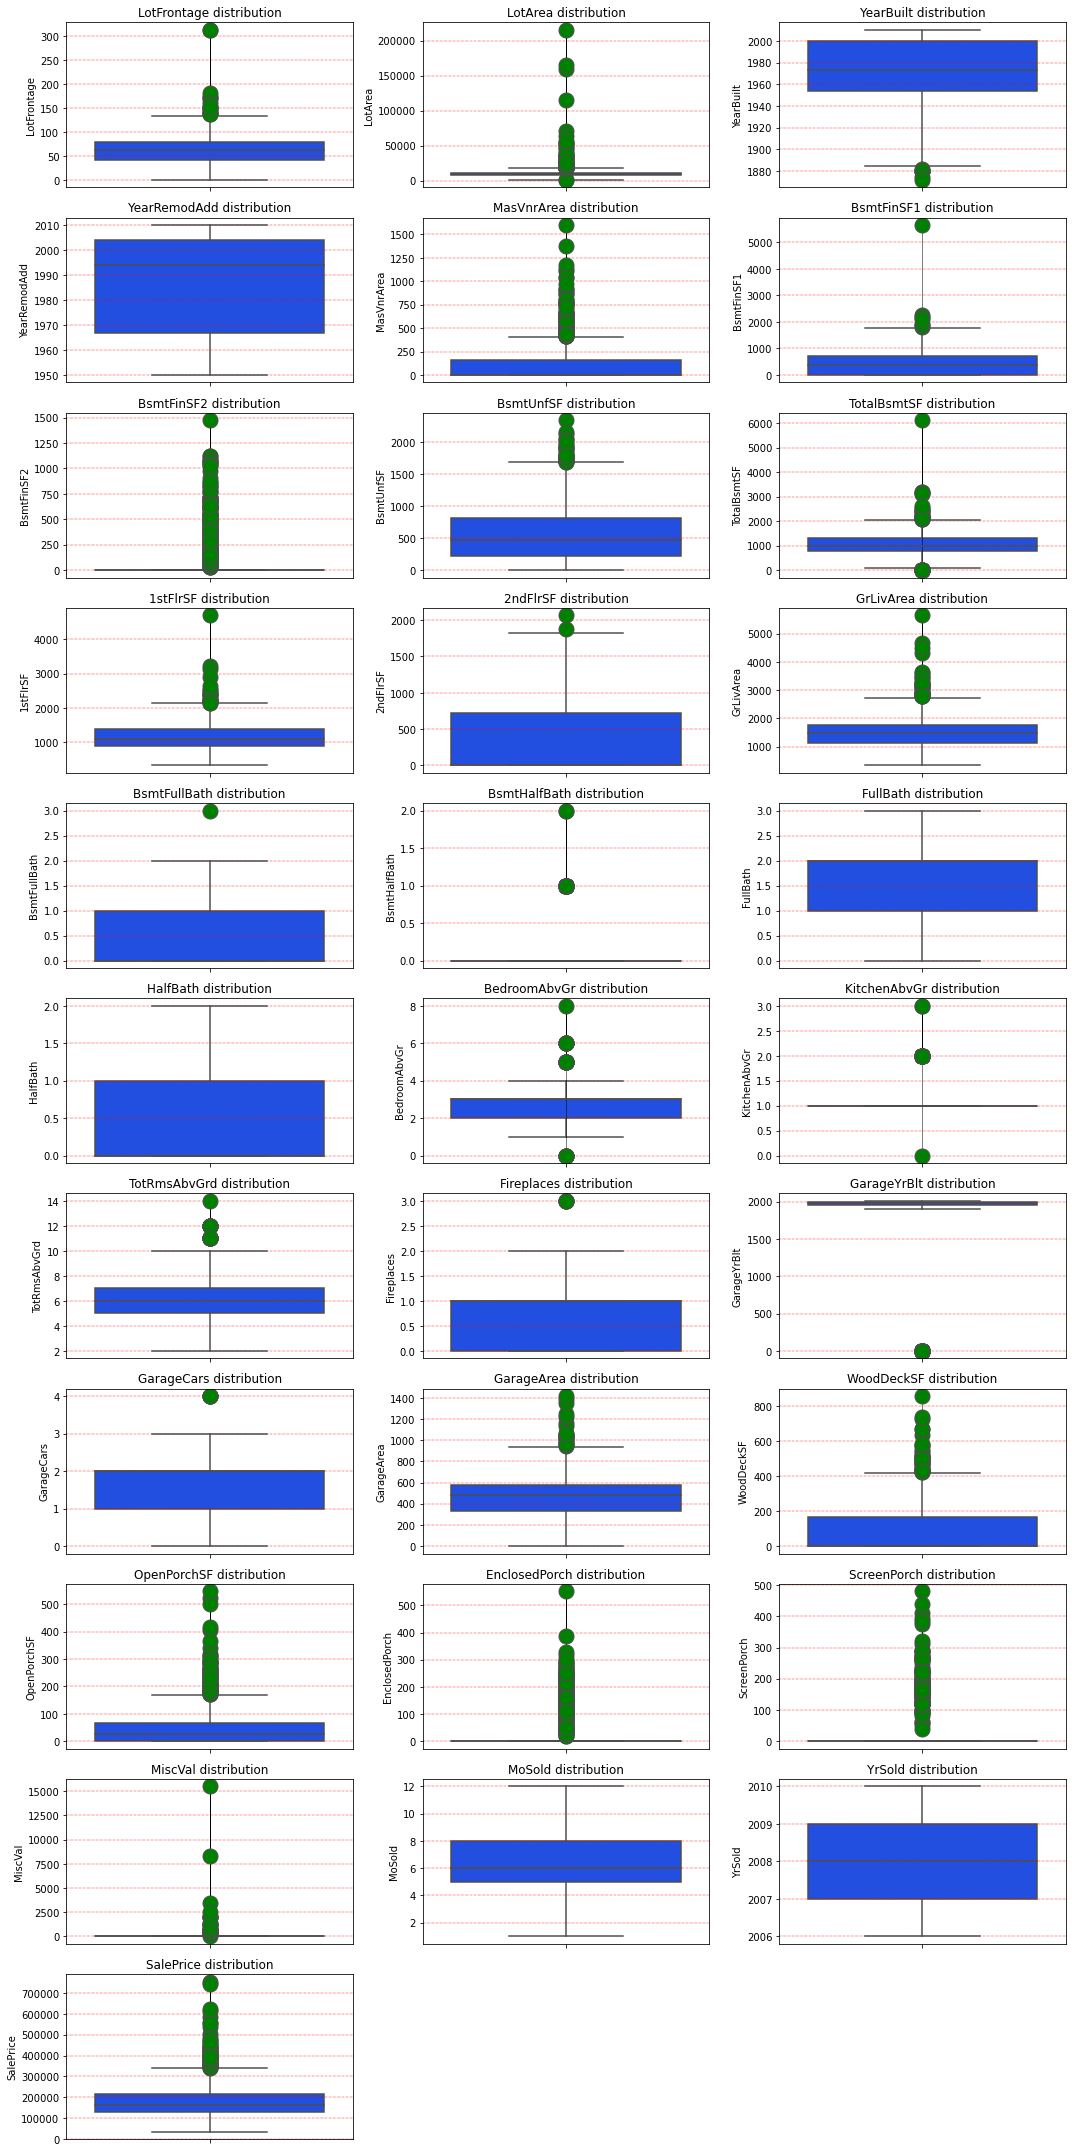

In [45]:
# lets take the columns from numeric columns
numeric_columns = housing_df.select_dtypes(include=['int64','float64']).columns

# lets count how many rows will be required for printing all the box plots for numeric features
# taking 3 columns as the name of the columns to fit the row and not overlap
num_columns=3
# calculating number of row required 
num_rows=(len(numeric_columns)//num_columns)+1
# temp variable for subplot index
i=1

# setting the subplot figure size
plt.figure(2, figsize=(15,30))

# iterating through the numeric column listed
for column in numeric_columns:
#     setting the subplot position 
    plt.subplot(num_rows, num_columns, i)
#     setting the grid for the box plot
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
#     creating the dictionary with box plot configuration
    flierprops = dict(marker='o',markerfacecolor='green', markersize=15, linewidth=0.5,
                linestyle='-')
#     plotting the box plot for the numeric feature
    sns.boxplot(y= housing_df[column], palette="bright", flierprops=flierprops)
#     setting the title of the boxplot
    plt.title(column + " distribution")
#     increasing the temp variable
    i+=1
    
# making the boxplots to tightly fit in the output
plt.tight_layout()
# printing the boxplot
plt.show()

> We can clearly see that there are outliers there in GrLivArea, GarageArea, TotalBsmtSF, LotArea, ScreenPorch, MiscVal &  EnclosedPorch columns

### Removing outliers to make the model more robust

In [46]:
# printing the shape of the dataset before the outlier cleaning
print("Shape before removing outlier: ", housing_df.shape)

# taking the outliers in the column
outlier_columns = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea', 'ScreenPorch', 'MiscVal', 'EnclosedPorch']
for column in outlier_columns:
    Q1 = housing_df[column].quantile(.25)
    Q3 = housing_df[column].quantile(.99)
    IQR = Q3-Q1
    housing_df =  housing_df[(housing_df[column] >= (Q1-(1.5*IQR))) & (housing_df[column] <= (Q3+(1.5*IQR)))] 

# printing the shape of the dataset after the outlier cleaning
print("Shape after removing outlier: ", housing_df.shape)

Shape before removing outlier:  (1460, 72)
Shape after removing outlier:  (1447, 72)


In [47]:
# Year build, year remodeled and year sold are years which we cannot use for analysis at the  moment
# let take the age of these features
# getting the age of the house when the house is sold
housing_df['age']=housing_df['YrSold']-housing_df['YearBuilt']
# getting the age of garage when the house is sold
housing_df['garage_age'] = housing_df['YrSold'] - housing_df['GarageYrBlt']
# getting the age of house remodeled when the house is sold
housing_df['remodel_age'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

# as we generated the ages for the features, lets drop these unwanted features
housing_df.drop(['GarageYrBlt','YearBuilt', 'YearRemodAdd'],axis=1,inplace=True)

# printing the shape of the dataset post dropping
housing_df.shape

(1447, 72)

> we can see that shape is same as we added 3 columns and dropped 3 columns

### Creating dummy variables for the categorical features

In [48]:
# taking the categorical columns in a seperate object to create dummy features
# extracting only object datatype features
categorical_columns = housing_df.select_dtypes(include=['object']).columns
# printing the categorical columns
categorical_columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [49]:
# creating dummy variable for call categorical columns
column_dummy= pd.get_dummies(housing_df[categorical_columns], drop_first = True)
# adding the dummies to the dataset
housing_df=pd.concat([housing_df, column_dummy],axis=1)
# dropping the categorical feature as dummies are available
housing_df= housing_df.drop(categorical_columns,axis=1)
    
    
# printing the shape of the housing dataset post adding dummies
housing_df.shape

(1447, 263)

> As you can see now we have 263 columns available for analysis

In [50]:
# printing the housing dataset top 5 rows for cross-check
housing_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,age,garage_age,remodel_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu

## Splitting the dataset to X and y train

In [51]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# splitting the training and testing data set as 80-20 split using train_test_split, as we only have limited amount of data
df_train, df_test = train_test_split(housing_df, train_size = 0.8, test_size = 0.2, random_state = 100)
# taking sale price of df_train to y_train
y_train = df_train.pop('SalePrice')
# taking sale price of df_test to y_test
y_test = df_test.pop('SalePrice')
# except for salePrice column is stored in X_train & X_test
X_train = df_train
X_test = df_test

In [52]:
# printing both training and testing dataset shape
print(f"training dataset shape: {X_train.shape}")
print(f"test dataset shape: {X_test.shape}")

training dataset shape: (1157, 262)
test dataset shape: (290, 262)


In [53]:
# printing X_traing top 5 rows
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,age,garage_age,remodel_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,Firepl

In [54]:
# printing the stats of the training dataset
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,age,garage_age,remodel_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,Firepl

### Rescaling the Features
Based on the above status we can observe that all the columns data is not spread across the same range
<br>
To keep all the feature in same range for better interpretation, using Min-Max Scaler (normalization)

In [55]:
# creating MinMaxScaler object
scaler = MinMaxScaler()

In [56]:
# Apply scaler() to 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
# '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'& 'EnclosedPorch' columns
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
# normalizing the training the data by performing fit and transform of the data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [57]:
#taking power transformation for the SalePrice feature as the values are above 10K
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

In [58]:
# printing the stats of the training data post scaling
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,age,garage_age,remodel_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,Firepl

In [59]:
# We have total of 29 columns in the dataset, let's assume as take top 15 columns
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [60]:
# Printing the RFE results
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 208),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 137),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 106),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 110),
 ('BsmtHalfBath', False, 147),
 ('FullBath', False, 122),
 ('HalfBath', False, 123),
 ('BedroomAbvGr', False, 195),
 ('KitchenAbvGr', False, 30),
 ('TotRmsAbvGrd', False, 206),
 ('Fireplaces', False, 175),
 ('GarageCars', False, 149),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 19),
 ('OpenPorchSF', False, 157),
 ('EnclosedPorch', False, 164),
 ('ScreenPorch', False, 230),
 ('MiscVal', False, 233),
 ('MoSold', False, 231),
 ('YrSold', False, 227),
 ('age', False, 218),
 ('garage_age', False, 228),
 ('remodel_age', False, 226),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 90),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 94),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 55),


In [61]:
# Taking the RFE supported columns/features and storing in col variable
col = X_train.columns[rfe.support_]
# printing the columns choosen by RFE
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSZoning_Floating Village', 'MSZoning_Residential High Density',
       'MSZoning_Residential Low Density',
       'MSZoning_Residential Medium Density', 'Neighborhood_Crawfor',
       'OverallQual_Excellent', 'OverallQual_Fair', 'OverallQual_Good',
       'OverallQual_Poor', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'OverallQual_Very Poor',
       'OverallCond_Very Poor', 'Exterior1st_BrkComm', 'Heating_Grav',
       'Electrical_Mix', 'Functional_Maj2', 'Functional_Sev'],
      dtype='object')

In [62]:
# Printing the columns left by RFE for reference
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col]

In [64]:
# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

In [65]:
# Running the linear model with above data
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [66]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     271.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:58   Log-Likelihood:                 2042.1
No. Observations:                1157   AIC:                            -4032.
Df Residuals:                    1131   BIC:                            -3901.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> We can see that model R-square value as 85 and it seems only two P values of the features are over 5% margin

Lets see the VIF of the model

In [67]:
# creating a reusable method to use multiple times
def get_vif(X):
#     Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
#     taking the features from the dataset
    vif['Features'] = X.columns
#     getting the VIF value for each feature
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     rounding the VIF value to 2 decimal points
    vif['VIF'] = round(vif['VIF'], 2)
#     sorting the VIF data
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_vif(X_train_lm)

,Features,VIF
4,GrLivArea,41.81
2,TotalBsmtSF,25.64
9,MSZoning_Residential Low Density,12.00
5,GarageArea,9.90
3,2ndFlrSF,8.55
0,LotArea,4.55
1,BsmtFinSF1,2.78
10,MSZoning_Residential Medium Density,2.48
18,OverallQual_Very Poor,2.03
19,OverallCond_Very Poor,2.00


> There seems to be very high multicollineariaty between the columns GrLivArea, TotalBsmtSF & MSZoning_Residential Low Density, which is over 10

Lets drop the highest VIF value features and see how the model behaving

In [68]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['GrLivArea'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     265.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:58   Log-Likelihood:                 2010.9
No. Observations:                1157   AIC:                            -3972.
Df Residuals:                    1132   BIC:                            -3845.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> there seems to be very minor change in the R-square value

Lets see the vif of the model again

In [69]:
# Now let's look inti VIF values again
get_vif(X_train_lm)

,Features,VIF
2,TotalBsmtSF,15.45
8,MSZoning_Residential Low Density,11.87
4,GarageArea,9.69
0,LotArea,4.31
1,BsmtFinSF1,2.78
9,MSZoning_Residential Medium Density,2.46
3,2ndFlrSF,2.26
17,OverallQual_Very Poor,2.03
18,OverallCond_Very Poor,2.00
16,OverallQual_Very Good,1.83


> now the VIF of the features come down but still there are features with VIF more than 10. We will have our baseline as 5 for VIF

In [70]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['TotalBsmtSF'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:                 1881.0
No. Observations:                1157   AIC:                            -3714.
Df Residuals:                    1133   BIC:                            -3593.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> there seems to be 3% drop in R-square value, but still model is explaining 81%

In [71]:
# Now let's look inti VIF values again
get_vif(X_train_lm)

,Features,VIF
3,GarageArea,9.26
7,MSZoning_Residential Low Density,7.63
0,LotArea,4.16
1,BsmtFinSF1,2.52
16,OverallQual_Very Poor,2.01
17,OverallCond_Very Poor,2.00
2,2ndFlrSF,1.99
8,MSZoning_Residential Medium Density,1.74
12,OverallQual_Good,1.67
15,OverallQual_Very Good,1.61


> Now we have couple of features available above 5 of VIF.

Lets drop these feature and see the model again

In [72]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['GarageArea'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_4.summary())
print('\n\n\n\n\n')
# Now let's look inti VIF values again
print(get_vif(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:                 1792.9
No. Observations:                1157   AIC:                            -3540.
Df Residuals:                    1134   BIC:                            -3424.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> We can see that now all the feature VIF value is under 5
> there is again 3% drop in the R-square but 78 is a good model

> Now there are features with P-value more than 5%, lets drop one by one and see the model again

In [73]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['Electrical_Mix'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_5 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_5.summary())
print('\n\n\n\n\n')
# Now let's look inti VIF values again
print(get_vif(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:                 1792.6
No. Observations:                1157   AIC:                            -3541.
Df Residuals:                    1135   BIC:                            -3430.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> dropping the feature doesn't affect other feature p-value as well as VIF

> lets drop the remaining feature and see the model

In [74]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['Functional_Sev'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_6 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_6.summary())
print('\n\n\n\n\n')
# Now let's look inti VIF values again
print(get_vif(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:                 1791.7
No. Observations:                1157   AIC:                            -3541.
Df Residuals:                    1136   BIC:                            -3435.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> dropping the feature doesn't affect other feature p-value as well as VIF

> lets drop the final feature and see the model

In [75]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop(['OverallCond_Very Poor'], axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_7 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_7.summary())
print('\n\n\n\n\n')
# Now let's look inti VIF values again
print(get_vif(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:                 1790.6
No. Observations:                1157   AIC:                            -3541.
Df Residuals:                    1137   BIC:                            -3440.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

> Now the model R-Square and Adjust R-quare are aproximately equal

> All feature P-value is less than 5%

> all features VIF is less than 5

In [76]:
# Predicting the house price of training model from the final linear regression model
y_train_pred = lm_7.predict(X_train_rfe)

In [77]:
# converting the y_train to dataframe for plotting purpose
y_train= pd.DataFrame(data=y_train)

Text(0.5, 0, 'Errors')

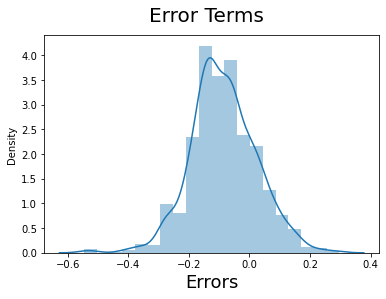

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('Errors', fontsize = 18)

> we can see there is a distortion in the error plt in left side and peak of the normal curve

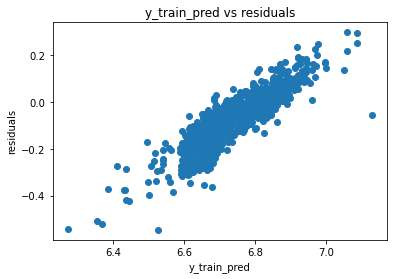

In [79]:
# Plotting scatter plot between y_train_pred and residuals
plt.figure()
y_diff = y_train-y_train_pred
plt.scatter(y_train_pred, y_diff[0])
# x-label
plt.xlabel('y_train_pred')
# y-label
plt.ylabel('residuals')
# title of the plot
plt.title('y_train_pred vs residuals')
plt.show()

> we can see there is a pattern on above scatter plot [linear relation]

Lets see the ridge regression for the dataset

# Ridge Regression

Fitting 11 folds for each of 26 candidates, totalling 286 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 286 out of 286 | elapsed:   12.6s finished


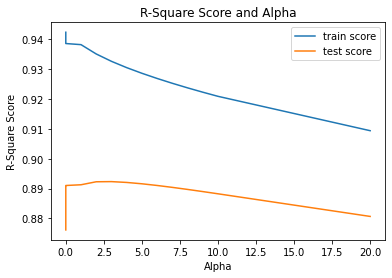

The optimum alpha is 3
The R-Square value of the model on the test dataset for optimum alpha 3 is 0.8875248835842555
The Mean Square Error of the model on the test dataset for optimum alpha 3 is 0.001214269203142688
The Mean Absolute Error of the model on the test dataset for optimum alpha 3 is 0.0240070646375004


In [80]:
# now lets do the ridge regression on the model and see the result

# taking the list of alphas values for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

# creating ridge object
ridge = Ridge()

# Using RFE to find top 100 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=200)
# fitting the training data into rfe to fetch the better columns
rfe = rfe.fit(X_train,y_train)
# getting the RFE supported columns
col = X_train.columns[rfe.support_]
# taking only RFE supported columns from X_train
X_train_rfe = X_train[col]
# taking only RFE supported columns from X_test
X_test_rfe = X_test[col]

# cross validation
folds = 11
# taking GridSerachCV for model selection
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
# fitting the model with training data
model_cv.fit(X_train_rfe, y_train) 

# taking the results from the model cv as dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# taking only results with alpha <=30 
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting the graph for mean train score
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting the graph for mean test score
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting the X axis label
plt.xlabel('Alpha')
# setting Y-Axis label
plt.ylabel('R-Square Score')
# Setting the title to plot
plt.title("R-Square Score and Alpha")
# proving the legend for the plot as we have two data in single plot
plt.legend(['train score', 'test score'], loc='upper right')
# printing the plot
plt.show()

# now lets take the optimum alpha value
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
# priting the optimum alpha value
print('The optimum alpha is',alpha)
# calculating the final ridge values
ridge_final = Ridge(alpha=alpha)
# fitting the training data in ridge final
ridge_final.fit(X_train_rfe,y_train)
# getting the ridge coeficient
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
# Printing the required stats
print(f'The R-Square value of the model on the test dataset for optimum alpha {alpha} is {r2_score(y_test, y_test_pred)}')
print(f'The Mean Square Error of the model on the test dataset for optimum alpha {alpha} is {mean_squared_error(y_test, y_test_pred)}')
print(f'The Mean Absolute Error of the model on the test dataset for optimum alpha {alpha} is {mean_absolute_error(y_test, y_test_pred)}')

> We can observe that the optimum Alpha is 3 and the R-square of the model is 88 which is good for the model

Lets check the VIF of the features and take 10 as cut-off

In [81]:
# Chekcing the VIF
vif = get_vif(X_train_rfe)
# taking the VIF more than 10 as very high and dropping these features
very_high_vif = vif[vif['VIF']>10]
# printing the very high VIF 
very_high_vif

,Features,VIF
183,GarageCond_No Garage,inf
155,Electrical_Mix,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
172,GarageType_No Garage,inf
173,GarageFinish_No Garage,inf
131,BsmtCond_Po,inf
178,GarageQual_No Garage,inf


We can see there are features with infinite VIF value. Droping these features

In [82]:
# Dropping cols with high VIF
# dropping the features in X_train
X_train_rfe2 = X_train_rfe.drop(very_high_vif.Features,axis=1)
# dropping the features in X_test
X_test_rfe2 = X_test_rfe.drop(very_high_vif.Features,axis=1)

Fitting 11 folds for each of 26 candidates, totalling 286 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 286 out of 286 | elapsed:   10.8s finished


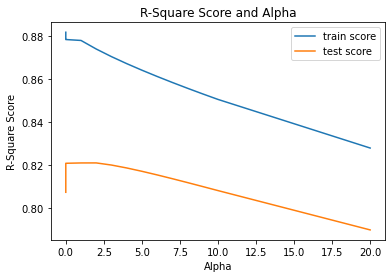

The optimum alpha is 2
The R-Square value of the model on the test dataset for optimum alpha 2 is 0.7991131598125092
The Mean Square Error of the model on the test dataset for optimum alpha 2 is 0.002168752619509812
The Mean Absolute Error of the model on the test dataset for optimum alpha 2 is 0.033208071581825975


In [83]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

# taking ridge instance with random state of 100
ridge = Ridge(random_state=100)

# re-initializing the GridSearchCV with the ridge of random state 100
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
# fitting the model with new training data
model_cv.fit(X_train_rfe2, y_train) 

# lets take the grid search cv results in cv results object
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


# plotting the graph for mean train score
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting the graph for mean test score
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting the X axis label
plt.xlabel('Alpha')
# setting Y-Axis label
plt.ylabel('R-Square Score')
# Setting the title to plot
plt.title("R-Square Score and Alpha")
# proving the legend for the plot as we have two data in single plot
plt.legend(['train score', 'test score'], loc='upper right')
# printing the plot
plt.show()

# now lets take the optimum alpha value
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
# priting the optimum alpha value
print('The optimum alpha is',alpha)

# calculating the final ridge values
ridge_final_2 = Ridge(alpha=alpha,random_state=100)
# fitting the training data in ridge final
ridge_final_2.fit(X_train_rfe2,y_train)
# getting the ridge coeficient
ridge_coef_2 = ridge_final_2.coef_
y_test_pred = ridge_final_2.predict(X_test_rfe2)
# Printing the required stats
print(f'The R-Square value of the model on the test dataset for optimum alpha {alpha} is {r2_score(y_test, y_test_pred)}')
print(f'The Mean Square Error of the model on the test dataset for optimum alpha {alpha} is {mean_squared_error(y_test, y_test_pred)}')
print(f'The Mean Absolute Error of the model on the test dataset for optimum alpha {alpha} is {mean_absolute_error(y_test, y_test_pred)}')

> Now we can observe that Alpha value is 2 and model R-square value is ~80, which is not a bad thing

Lets calculate the ridge coefficients

In [84]:
#Displaing the co-efficients of the model
ridge_coef_2 = pd.DataFrame(np.atleast_2d(ridge_coef_2),columns=X_train_rfe2.columns)
# taking the T value of the ridge cofficient
ridge_coef_2 = ridge_coef_2.T
# renaming the coefficient column for better understanding
ridge_coef_2.rename(columns={0: 'Ridge-Coefficients'},inplace=True)
# sorting the coefficients for better understanding
ridge_coef_2.sort_values(by=['Ridge-Coefficients'], ascending=False,inplace=True)
# printing top 25 coefficients
ridge_coef_2.head(25)

,Ridge-Coefficients
OverallQual_Very Excellent,0.114324
LotArea,0.109724
OverallQual_Excellent,0.105768
OverallQual_Very Good,0.066107
MasVnrArea,0.057211
Neighborhood_Crawfor,0.051225
Neighborhood_NridgHt,0.049525
WoodDeckSF,0.049369
Neighborhood_StoneBr,0.046637
SaleType_ConLD,0.039744


# Lasso Regression

As we done Ridge regression, let try doing Lasso regression to see how the model pridict with Lasso regression

Fitting 11 folds for each of 11 candidates, totalling 121 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 121 out of 121 | elapsed:    5.4s finished


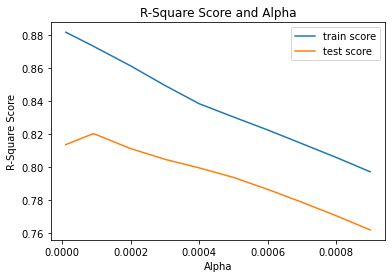

The optimal alpha is 9e-05
The R-Square value of the model on the test dataset for optimum alpha 9e-05 is 0.8011170838719079
The Mean Square Error of the model on the test dataset for optimum alpha 9e-05 is 0.0021471184719018188
The Mean Absolute Error of the model on the test dataset for optimum alpha 9e-05 is 0.032524441168871314


In [85]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
# taking the lasso regression object with random state of 100
lasso = Lasso(random_state=100)

# Taking the Grid Search CV object for lasso regression
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
# fitting the training data to the model
model_cv.fit(X_train_rfe2, y_train) 

# taking the results from the model 
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting the graph for mean train score
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting the graph for mean test score
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting the X axis label
plt.xlabel('Alpha')
# setting Y-Axis label
plt.ylabel('R-Square Score')
# Setting the title to plot
plt.title("R-Square Score and Alpha")
# proving the legend for the plot as we have two data in single plot
plt.legend(['train score', 'test score'], loc='upper right')
# printing the plot
plt.show()

# getting the optimal alpha value
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
# printing the optimal alpha value
print('The optimal alpha is',alpha)
# getting the final lasso model with optimal alpha value
lasso_final = Lasso(alpha=alpha,random_state=100)
# fitting the lasso model with training data again
lasso_final.fit(X_train_rfe2,y_train)
# getting the lasso coefficient
lasso_coef = lasso_final.coef_
# predicting the sale price in test set
y_test_pred = lasso_final.predict(X_test_rfe2)
# Printing the required stats
print(f'The R-Square value of the model on the test dataset for optimum alpha {alpha} is {r2_score(y_test, y_test_pred)}')
print(f'The Mean Square Error of the model on the test dataset for optimum alpha {alpha} is {mean_squared_error(y_test, y_test_pred)}')
print(f'The Mean Absolute Error of the model on the test dataset for optimum alpha {alpha} is {mean_absolute_error(y_test, y_test_pred)}')

> we can see that optimum value of alpha is 9e-05 which is very low alpha value and the model explain 80% of the change in sale price

In [86]:
#Now lets take the coefficients of the lasso regression to explain model
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train_rfe2.columns)
lasso_coeff = lasso_coeff.T
# renaming the coefficient column with appropriate name
lasso_coeff.rename(columns={0: "Lasso-Coefficient"},inplace=True)
# sorting the coefficient column values for better understaind
lasso_coeff.sort_values(by=["Lasso-Coefficient"], ascending=False,inplace=True)
# printing only top 25 coefficients
lasso_coeff.head(25)

,Lasso-Coefficient
LotArea,0.144175
OverallQual_Very Excellent,0.133369
OverallQual_Excellent,0.117250
OverallQual_Very Good,0.073691
MasVnrArea,0.052417
Neighborhood_Crawfor,0.048434
WoodDeckSF,0.047984
Neighborhood_NridgHt,0.042436
Neighborhood_StoneBr,0.040297
OverallQual_Good,0.036247


> we can see that these Lasso regression model coefficients are similar to the final model which we got 

In [87]:
# printing ridge final 
ridge_final_2

Ridge(alpha=2, random_state=100)

In [88]:
# printing lasso final
lasso_final

Lasso(alpha=9e-05, random_state=100)

In [89]:
# priting all the Lasso model coefficients
lasso_coeff

,Lasso-Coefficient
LotArea,0.144175
OverallQual_Very Excellent,0.133369
OverallQual_Excellent,0.117250
OverallQual_Very Good,0.073691
MasVnrArea,0.052417
Neighborhood_Crawfor,0.048434
WoodDeckSF,0.047984
Neighborhood_NridgHt,0.042436
Neighborhood_StoneBr,0.040297
OverallQual_Good,0.036247


lets see the expression of the model with coefficients

In [106]:
expression = ''
for coeff, feature in zip(lasso_coeff['Lasso-Coefficient'], lasso_coeff.index):
    if coeff!=0:
        expression += f' {feature} * ({round(coeff, 4)}) +'
print('Expression of the model: '+expression[:-1])

Expression of the model:  LotArea * (0.1442) + OverallQual_Very Excellent * (0.1334) + OverallQual_Excellent * (0.1173) + OverallQual_Very Good * (0.0737) + MasVnrArea * (0.0524) + Neighborhood_Crawfor * (0.0484) + WoodDeckSF * (0.048) + Neighborhood_NridgHt * (0.0424) + Neighborhood_StoneBr * (0.0403) + OverallQual_Good * (0.0362) + Neighborhood_NoRidge * (0.0312) + SaleType_ConLD * (0.0311) + Exterior1st_BrkFace * (0.0239) + Foundation_PConc * (0.0234) + FireplaceQu_TA * (0.0215) + FireplaceQu_Gd * (0.0205) + Neighborhood_ClearCr * (0.0203) + OpenPorchSF * (0.0197) + MSSubClass_2-1/2 STORY ALL AGES * (0.0185) + BsmtExposure_Gd * (0.0173) + OverallCond_Excellent * (0.0167) + HalfBath * (0.0167) + Neighborhood_Somerst * (0.0165) + Neighborhood_NPkVill * (0.0163) + BsmtFullBath * (0.0151) + GarageCond_Po * (0.0138) + Alley_Paved * (0.0136) + Neighborhood_NWAmes * (0.0126) + BsmtHalfBath * (0.0115) + Exterior2nd_ImStucc * (0.0113) + OverallCond_Good * (0.0111) + RoofStyle_Mansard * (0.00

We can see the expression and state below points 
* Lot Area is affecting the sales price by 14%
* Overall Quality good and above quality (Good, Very Good, Excellent, Very Excellent) is explaining ~35% of the sales price
* Same time if Overall quality is less than average it affective the sales price in a negative raltion and which explains 38% of the sales price in negative relation

# Problem Statement - Part II

## Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [107]:
lasso_final1 = Lasso(alpha=alpha*2,random_state=100)
# fitting the lasso model with training data again
lasso_final1.fit(X_train_rfe2,y_train)
# getting the lasso coefficient
lasso_coef1 = lasso_final1.coef_
# predicting the sale price in test set
y_test_pred = lasso_final1.predict(X_test_rfe2)
# Printing the required stats
print(f'The R-Square value of the model on the test dataset for optimum alpha {alpha*2} is {r2_score(y_test, y_test_pred)}')
print(f'The Mean Square Error of the model on the test dataset for optimum alpha {alpha*2} is {mean_squared_error(y_test, y_test_pred)}')
print(f'The Mean Absolute Error of the model on the test dataset for optimum alpha {alpha*2} is {mean_absolute_error(y_test, y_test_pred)}')

The R-Square value of the model on the test dataset for optimum alpha 2e-05 is 0.7716678387720257
The Mean Square Error of the model on the test dataset for optimum alpha 2e-05 is 0.002465049339814056
The Mean Absolute Error of the model on the test dataset for optimum alpha 2e-05 is 0.034107407410106684


In [109]:
#Now lets take the coefficients of the lasso regression to explain model
lasso_coef1 = pd.DataFrame(np.atleast_2d(lasso_coef1),columns=X_train_rfe2.columns)
lasso_coef1 = lasso_coef1.T
# renaming the coefficient column with appropriate name
lasso_coef1.rename(columns={0: "Lasso-Coefficient"},inplace=True)
# sorting the coefficient column values for better understaind
lasso_coef1.sort_values(by=["Lasso-Coefficient"], ascending=False,inplace=True)
# printing only top 25 coefficients
lasso_coef1.head(25)

,Lasso-Coefficient
LotArea,0.143830
OverallQual_Very Excellent,0.131755
OverallQual_Excellent,0.117023
OverallQual_Very Good,0.071129
GarageCond_Po,0.056938
MasVnrArea,0.055672
Neighborhood_Crawfor,0.051645
WoodDeckSF,0.047168
Neighborhood_StoneBr,0.046596
Neighborhood_NridgHt,0.046040


In [108]:
# calculating the final ridge values
ridge_final_3 = Ridge(alpha=4,random_state=100)
# fitting the training data in ridge final
ridge_final_3.fit(X_train_rfe2,y_train)
# getting the ridge coeficient
ridge_coef_3 = ridge_final_3.coef_
y_test_pred = ridge_final_3.predict(X_test_rfe2)
# Printing the required stats
print(f'The R-Square value of the model on the test dataset for optimum alpha 4 is {r2_score(y_test, y_test_pred)}')
print(f'The Mean Square Error of the model on the test dataset for optimum alpha 4 is {mean_squared_error(y_test, y_test_pred)}')
print(f'The Mean Absolute Error of the model on the test dataset for optimum alpha 4 is {mean_absolute_error(y_test, y_test_pred)}')

The R-Square value of the model on the test dataset for optimum alpha 4 is 0.8079733871558026
The Mean Square Error of the model on the test dataset for optimum alpha 4 is 0.0020730985625178966
The Mean Absolute Error of the model on the test dataset for optimum alpha 4 is 0.03279263468922655


In [110]:
#Now lets take the coefficients of the lasso regression to explain model
ridge_coef_3 = pd.DataFrame(np.atleast_2d(ridge_coef_3),columns=X_train_rfe2.columns)
ridge_coef_3 = ridge_coef_3.T
# renaming the coefficient column with appropriate name
ridge_coef_3.rename(columns={0: "ridge-Coefficient"},inplace=True)
# sorting the coefficient column values for better understaind
ridge_coef_3.sort_values(by=["ridge-Coefficient"], ascending=False,inplace=True)
# printing only top 25 coefficients
ridge_coef_3.head(25)

,ridge-Coefficient
OverallQual_Very Excellent,0.101745
OverallQual_Excellent,0.097306
LotArea,0.090449
OverallQual_Very Good,0.063249
MasVnrArea,0.055818
Neighborhood_NridgHt,0.050519
Neighborhood_Crawfor,0.049176
WoodDeckSF,0.048608
Neighborhood_StoneBr,0.043736
Neighborhood_NoRidge,0.036007
